# Time Series Analysis study

Studying with Time Series Analysis with Python - Tarek A. Atwan

Data set source: https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/tree/main/datasets

Examples code extracted. Every now and then,modified with my own notes: https://github.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/blob/main/code

In [1]:
# pip install urllib
# pip install modin[dask] 

In [2]:
import pandas as pd
from urllib import request


# CSV File:  Reading a series

Defining index as time series and other columns


In [3]:
#Loading File
URL = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch2/movieboxoffice.csv"

response = request.urlretrieve(URL, r".//Data/ts.csv")

In [4]:
#Reading File
ts_csv = pd.read_csv(r".//Data/ts.csv",
                 header=0,
                parse_dates=['Date'],
                index_col=0,
                infer_datetime_format=True,
                usecols=['Date',
                        'DOW',
                        'Daily',
                        'Forecast',
                        'Percent Diff']
                )


# # When infer_datetime_format=True does not work

# #Format / date parser
# date_parser = lambda x: pd.to_datetime(x,format='%d-%b-%y')
# ts = pd.read_csv(r".//Data/ts.csv",
#                  header=0,
#                 parse_dates=[0],
#                 index_col=0,
#                 date_parser=date_parser,
#                 usecols=['Date',
#                         'DOW',
#                         'Daily',
#                         'Forecast',
#                         'Percent Diff']
#                 )

In [5]:
# ## Chunking (to optimize memory usage) --check pandas error

# from modin.config import Engine
# Engine.put('dask') # Modin will use Dask
# import modin.pandas as pd

# ts_csv = pd.read_csv(r".//Data/ts.csv",
#                  header=0,
#                 parse_dates=[0],
#                 index_col=0,
#                 date_parser=date_parser,
#                 usecols=['Date',
#                         'DOW',
#                         'Daily',
#                         'Forecast',
#                         'Percent Diff']
#                 )

## First look at dataset

In [6]:
display(ts_csv.info(),ts_csv.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DOW           128 non-null    object
 1   Daily         128 non-null    object
 2   Forecast      128 non-null    object
 3   Percent Diff  128 non-null    object
dtypes: object(4)
memory usage: 5.0+ KB


None

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,"$125,789.89","$235,036.46",-46.48%
2021-04-27,Saturday,"$99,374.01","$197,622.55",-49.72%
2021-04-28,Sunday,"$82,203.16","$116,991.26",-29.74%
2021-04-29,Monday,"$33,530.26","$66,652.65",-49.69%
2021-04-30,Tuesday,"$30,105.24","$34,828.19",-13.56%


In [7]:
# cleaning non-numeric characters ($,.)
clean = lambda x :x.str.replace('[^\d]','',regex=True)
c_df = ts_csv[['Daily','Forecast']].apply(clean,axis=1)
ts_csv[['Daily','Forecast']] = c_df.astype(float)


In [8]:
display(ts_csv.info(),ts_csv.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 128 entries, 2021-04-26 to 2021-08-31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DOW           128 non-null    object 
 1   Daily         128 non-null    float64
 2   Forecast      128 non-null    float64
 3   Percent Diff  128 non-null    object 
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


None

,DOW,Daily,Forecast,Percent Diff
Date,,,,
2021-04-26,Friday,12578989.0,23503646.0,-46.48%
2021-04-27,Saturday,9937401.0,19762255.0,-49.72%
2021-04-28,Sunday,8220316.0,11699126.0,-29.74%
2021-04-29,Monday,3353026.0,6665265.0,-49.69%
2021-04-30,Tuesday,3010524.0,3482819.0,-13.56%


In [11]:
# deleting variables
del ts_csv

# Persisting (serialization and de-serialization)

In [30]:
# Loading file

URL = "https://raw.githubusercontent.com/PacktPublishing/Time-Series-Analysis-with-Python-Cookbook/main/datasets/Ch4/time_series_covid19_confirmed_global.csv"

response = request.urlretrieve(URL, r".//Data/ts2.csv")

#Reading File
ts_csv2 = pd.read_csv(r".//Data/ts2.csv")
ts_csv2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/19/21,9/20/21,9/21/21,9/22/21,9/23/21,9/24/21,9/25/21,9/26/21,9/27/21,9/28/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,154487,154585,154712,154757,154800,154960,154960,154960,155072,155093
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,162953,163404,164276,165096,165864,166690,167354,167893,168188,168782
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,201600,201766,201948,202122,202283,202449,202574,202722,202877,203045
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,15124,15140,15140,15153,15156,15167,15167,15167,15189,15192
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,52307,52644,52968,53387,53840,54280,54795,55121,55583,56040


In [13]:
#Filtering just USA
df_usa = ts_csv2[ts_csv2['Country/Region']== 'US']

# #Cases from June to end September
df_usa_summer = df_usa.loc[:,'6/1/20':'9/30/20']

df_usa_summer.head()

,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,...,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20
254,1816679,1837948,1857728,1879463,1904375,1925849,1944117,1960815,1978823,2000019,...,6860254,6900324,6939235,6986604,7034971,7079902,7117964,7150631,7194195,7233295


In [14]:
# Wide to Long(Unpivoting)
df_usa_summer_unpivoted = pd.melt(df_usa_summer,
                                 value_vars = df_usa_summer.columns,
                                 value_name = 'cases',
                                 var_name = 'date').set_index('date')
# setting type to index
df_usa_summer_unpivoted.index = pd.to_datetime(df_usa_summer_unpivoted.index)

#looking at data
display(df_usa_summer_unpivoted.info(),df_usa_summer_unpivoted.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-06-01 to 2020-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   122 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


None

,cases
date,
2020-06-01,1816679
2020-06-02,1837948
2020-06-03,1857728
2020-06-04,1879463
2020-06-05,1904375


## Serializing De- Serializing data

In [15]:
#pickle with pandas
df_usa_summer_unpivoted.to_pickle(r".//Data/ts2.pkl")

unpickled_df = pd.read_pickle(r".//Data/ts2.pkl") #default format is set to infer and the extension tells it :it can be, i.e, .pkl.zip...
display(unpickled_df.info(),unpickled_df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 122 entries, 2020-06-01 to 2020-09-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   122 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


None

,cases
date,
2020-06-01,1816679
2020-06-02,1837948
2020-06-03,1857728
2020-06-04,1879463
2020-06-05,1904375


## Pickling a function and its output

In [47]:
def covid_by_country(file,days,country):
    
    ts = pd.read_csv(file)
    ts = ts[ts['Country/Region'] == country]
    final = ts.iloc[:,-days:].sum()
    final.index = pd.to_datetime(final.index)
    return final


<AxesSubplot:title={'center':'COVID confirmed case for US'}, xlabel='Date', ylabel='# of confirmed cases'>

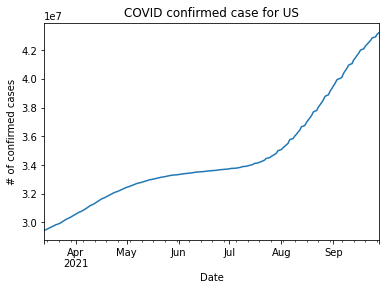

In [48]:
file = r".//Data/ts2.csv"
us_past_120_days = covid_by_country(file,200,'US')

us_past_120_days.plot(title=f'COVID confirmed case for US', xlabel='Date', ylabel='# of confirmed cases')

### Enhancing content (metadata)

In [51]:
# Modified path from original
import pickle
from datetime import datetime
metadata = {
    'date': datetime.now(),
    'data': '''
        COVID-19 Data Repository by the 
        Center for Systems Science and Engineering (CSSE) 
        at Johns Hopkins University'
        ''',
    'author': 'Tarek Atwan',
    'version': 1.0,
    'function': covid_by_country,
    'example' : us_past_120_days
}

output = Path(r'.//Data/covid.pkl')
with open(output, 'wb') as file:
    pickle.dump(metadata, file)

In [52]:
# Deserializing and loading the content
with open(output, 'rb') as file:
    content = pickle.load(file)
content.keys()

dict_keys(['date', 'data', 'author', 'version', 'function', 'example'])

2021-09-24    108227
2021-09-25    108266
2021-09-26    108309
2021-09-27    108344
2021-09-28    108386
dtype: int64

<AxesSubplot:title={'center':'COVID confirmed case for China'}, xlabel='Date', ylabel='# of confirmed cases'>

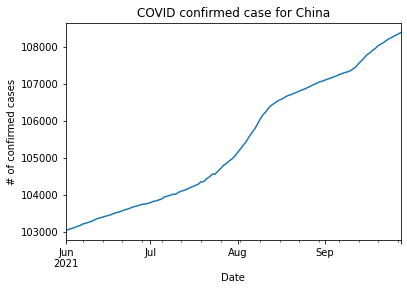

In [53]:
# retrieving and using the function

file = r".//Data/ts2.csv"

new_func = content['function']
df_china = new_func(file, 120, 'China')
display(df_china.tail())
display(df_china.plot(title=f'COVID confirmed case for China', xlabel='Date', ylabel='# of confirmed cases'))

<AxesSubplot:title={'center':'COVID confirmed case for US'}, xlabel='Date', ylabel='# of confirmed cases'>

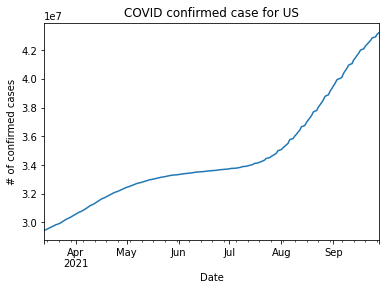

In [54]:
display(content['example'].plot(title=f'COVID confirmed case for US
                                ', xlabel='Date', ylabel='# of confirmed cases'))

## Working with DateTime

In [56]:
import pandas as pd
import numpy as np
import datetime as dt

### Working with DatetimeIndex

In [57]:
dates = ['2021-01-01', # date str format %Y-%m-%d
         '2/1/2021', # date str format %m/%d/%Y
         '03-01-2021', # date  str format %m-%d-%Y
         'April 1, 2021', # date  str format %B %d, %Y
         '20210501', # date str format %Y%m%d
          np.datetime64('2021-07-01'), # numpy datetime64
          dt.datetime(2021, 8, 1), # python datetime
          pd.Timestamp(2021,9,1) # pandas Timestamp
          ]

In [61]:
parsed_dates = pd.to_datetime(
                 dates,
                 infer_datetime_format=True,
                 errors='coerce'
                 )
#Errors
# errors='raise' -> raise an exception
# errors='coerce' -> inserts pd.Nat indicating missing value
# errors='ignore' -> pass the original value

#readable format
print('parsed_dates: ',parsed_dates)

# #readable format, same as :
print('pd.DatetimeIndex: ',pd.DatetimeIndex(dates))

parsed_dates:  DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)
pd.DatetimeIndex:  DatetimeIndex(['2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-07-01', '2021-08-01', '2021-09-01'],
              dtype='datetime64[ns]', freq=None)


In [69]:
display(dt.datetime.strptime('1/1/2022', '%m/%d/%Y'))
print(dt.datetime.strptime('1/1/2022', '%m/%d/%Y'),'\n')

display(dt.datetime.strptime('1 January, 2022', '%d %B, %Y').date())
print(dt.datetime.strptime('1 January, 2022', '%d %B, %Y').date(),'\n')

display(pd.to_datetime('1/1/2022', format='%m/%d/%Y'))
print(pd.to_datetime('1/1/2022', format='%m/%d/%Y'),'\n')

display(pd.to_datetime('1 January, 2022', format='%d %B, %Y'))
print(pd.to_datetime('1 January, 2022', format='%d %B, %Y'))

datetime.datetime(2022, 1, 1, 0, 0)

2022-01-01 00:00:00 



datetime.date(2022, 1, 1)

2022-01-01 



Timestamp('2022-01-01 00:00:00')

2022-01-01 00:00:00 



Timestamp('2022-01-01 00:00:00')

2022-01-01 00:00:00


#### Functions to extract information

In [63]:
print(f'Name of Day : {parsed_dates.day_name()}')
print(f'Month : {parsed_dates.month}')
print(f'Year : {parsed_dates.year}')
print(f'Days in Month : {parsed_dates.days_in_month}')
print(f'Quarter {parsed_dates.quarter}')
print(f'Quarter Start : {parsed_dates.is_quarter_start}')
print(f'Leap Year : {parsed_dates.is_leap_year}')
print(f'Month Start : {parsed_dates.is_month_start}')
print(f'Month End : {parsed_dates.is_month_end}')
print(f'Year Start : {parsed_dates.is_year_start}')

Name of Day : Index(['Friday', 'Monday', 'Monday', 'Thursday', 'Saturday', 'Thursday',
       'Sunday', 'Wednesday'],
      dtype='object')
Month : Int64Index([1, 2, 3, 4, 5, 7, 8, 9], dtype='int64')
Year : Int64Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021], dtype='int64')
Days in Month : Int64Index([31, 28, 31, 30, 31, 31, 31, 30], dtype='int64')
Quarter Int64Index([1, 1, 1, 2, 2, 3, 3, 3], dtype='int64')
Quarter Start : [ True False False  True False  True False False]
Leap Year : [False False False False False False False False]
Month Start : [ True  True  True  True  True  True  True  True]
Month End : [False False False False False False False False]
Year Start : [ True False False False False False False False]


#### Generating a DatetimeIndex

In [76]:
# Start, End, periods, freq

print(pd.date_range(start='2021-01-01', 
              periods=3, 
              freq='D'),'\n')

print(pd.date_range(start='2021-02-01',
               end='2021-02-03',
               freq='D'),'\n')

print(pd.date_range(start='2021-03-01',
               periods=3),'\n')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D') 

DatetimeIndex(['2021-02-01', '2021-02-02', '2021-02-03'], dtype='datetime64[ns]', freq='D') 

DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03'], dtype='datetime64[ns]', freq='D') 



### Working with Unix epoch timestamps

Unix-based timestamp reference point:
**January 1,1970 00:00:00 UTC**

In [79]:
import time
print(time.time())

1669671078.9886131


#### Select seconds!!!

https://www.epoch101.com/

In [80]:
pd.to_datetime(1669671078.9886131,unit='s')
#Given in GMT

Timestamp('2022-11-28 21:31:18.988613120')

In [82]:
#Time Zone aware

t = pd.to_datetime(1669671078.9886131,unit='s')

t.tz_localize('UTC').tz_convert('EST')

Timestamp('2022-11-28 16:31:18.988613120-0500', tz='EST')

In [83]:
df = pd.DataFrame(
        {'unix_epoch': [1641110340,  1641196740, 1641283140, 1641369540],
                'Sales': [23000, 19020, 21000, 17030]}
                )
df

,unix_epoch,Sales
0,1641110340,23000
1,1641196740,19020
2,1641283140,21000
3,1641369540,17030


In [84]:
# datetime in GMT
df['Date'] = pd.to_datetime(df['unix_epoch'], unit='s')

#Localizing (UTC and then adjusting to US/Pacific)
df['Date'] = df['Date'].dt.tz_localize('UTC').dt.tz_convert('US/Pacific')

#Setting as Index
df.set_index('Date', inplace=True)

df

,unix_epoch,Sales
Date,,
2022-01-01 23:59:00-08:00,1641110340,23000
2022-01-02 23:59:00-08:00,1641196740,19020
2022-01-03 23:59:00-08:00,1641283140,21000
2022-01-04 23:59:00-08:00,1641369540,17030


#### Converting a datetime to UnIx epoch

In [85]:
df = pd.DataFrame(
        {'Date': pd.date_range('01-01-2022', periods=5),
        'order' : range(5)}
                 )
df

,Date,order
0,2022-01-01,0
1,2022-01-02,1
2,2022-01-03,2
3,2022-01-04,3
4,2022-01-05,4


In [87]:
example = df
example['Date_POSIX']= (df['Date'] -  pd.Timestamp("1970-01-01")) // pd.Timedelta("1s")
example

,Date,order,Date_POSIX
0,2022-01-01,0,1640995200
1,2022-01-02,1,1641081600
2,2022-01-03,2,1641168000
3,2022-01-04,3,1641254400
4,2022-01-05,4,1641340800


In [88]:
pd.Timedelta("1s")

Timedelta('0 days 00:00:01')

### Working with time deltas